In [1]:
import pyspark
import random

In [2]:
from pyspark import SparkContext
sc = SparkContext()
from pyspark.sql import SQLContext
sqlc = SQLContext(sc)

In [5]:
df = sqlc.read.format('com.databricks.spark.csv').options(header = 'true',inferschema = 'true').load('iris_missing.csv')

In [6]:
df.show(5)

+-----------+----------+-----------+----------+-------+
|Sepallength|Sepalwidth|Petallength|Petalwidth|Species|
+-----------+----------+-----------+----------+-------+
|        5.1|       3.5|        1.4|       0.2| setosa|
|        4.9|       3.0|        1.4|       0.2| setosa|
|        4.7|       3.2|        1.3|       0.2| setosa|
|        4.6|       3.1|        1.5|       0.2| setosa|
|        5.0|       3.6|        1.4|       0.2| setosa|
+-----------+----------+-----------+----------+-------+
only showing top 5 rows



In [7]:
from pyspark.sql.functions import isnan, when, count, col

In [8]:
df.filter(col('Sepallength').isNull()).count()

5

In [9]:
df.filter(isnan('Sepallength')).count()

0

In [10]:
c='Sepalwidth'

In [12]:
# df.show()
# when(col(c)>3.0,'BIG') #returns column
#df.select(when(col(c)>3.0,'BIG')).show() #returns and shows dataframe
#df.select(when(col(c)>3.0,'BIG').otherwise('SMALL')).show()
#df.select(when((col(c)<4.0)&(col(c)>3.0),'BIG').when(col(c)>=4.0,'HUGE').otherwise('SMALL')).show()
#df.select(when((col(c)<4.0)&(col(c)>3.0),'BIG').when(col(c)>=4.0,'HUGE').otherwise('SMALL').alias(c)).show()
#df.select(count(when(col(c)>3.0,'BIG'))).show()
#df.select(count(when(col(c)>3.0,'BIG').alias(c))).show()
#for selecting you can ue Spark columns list:
#col1 = when(col(c)>3.0,'BIG').otherwise(0)
#col2 = when(col(c)<3.0,'SMALL').otherwise(0)
#df.select([col1,col2]).show()
#TRY to do Ex39 yourself as Activity

Column<b'CASE WHEN (Sepalwidth > 3.0) THEN BIG END'>

In [13]:
# Activity 12

# 1. Import pyspark library, set up SparkContext and SQLContext.
# 2. Read the CSV data into a Spark object

In [35]:
# 3. Fill in the missing values in the Sepallength column with the column's mean.

# 3.1. First, calculate the mean of the Sepallength column.
from pyspark.sql.functions import mean
avg_sl = df.select(mean('Sepallength')).toPandas()['avg(Sepallength)']

# 3.2. Now, impute the missing values in the Sepallength column with the column's mean.
y = df
y=y.na.fill(float(avg_sl), ['Sepallength'])

In [36]:
# 4. Compute the correlation matrix for the dataset. Make sure 
# to import the required modules.

from pyspark.mllib.stat import Statistics
import pandas as pd

In [37]:
# 5. Now, fill the missing values in the DataFrame before computing the correlation:

z=y.fillna(1)

# 6. Next, remove the String columns ('Species') from the PySpark DataFrame.

a = z.drop('Species')
a_1 = a.rdd.map(lambda row: row[0:]) 

In [38]:
# 7. Compute the correlation matrix in Spark

correlation_matrix = Statistics.corr(a_1, method = 'pearson')

# 8. Convert the correlation matrix into a pandas DataFrame and display it.

correlation_df = pd.DataFrame(correlation_matrix)
correlation_df.index, correlation_df.columns = a.columns, a.columns
correlation_df

,Sepallength,Sepalwidth,Petallength,Petalwidth
Sepallength,1.000000,-0.178848,0.841981,0.799270
Sepalwidth,-0.178848,1.000000,-0.264379,-0.338757
Petallength,0.841981,-0.264379,1.000000,0.909156
Petalwidth,0.799270,-0.338757,0.909156,1.000000


In [39]:
# 9. Plot the variable pairs showing strong positive correlation
# (more than 0.7) and fit a linear line on them.

# 9.1. First, load the data from the Spark DataFrame into a pandas DataFrame.

dt = y.toPandas()

# 9.2. Load the required modules and plotting data. Use Seaborn 
# sns.lmplot() method (importing matplotlib will be also required).

import matplotlib.pyplot as plt
import seaborn as sns

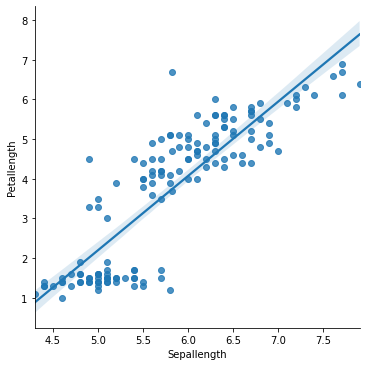

In [40]:
sns.lmplot(x='Sepallength',y='Petallength', data = dt)
plt.show()

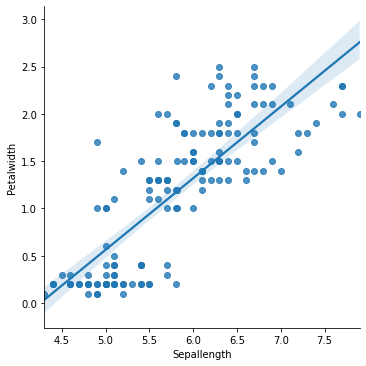

In [41]:
sns.lmplot(x='Sepallength',y='Petalwidth', data = dt)
plt.show()

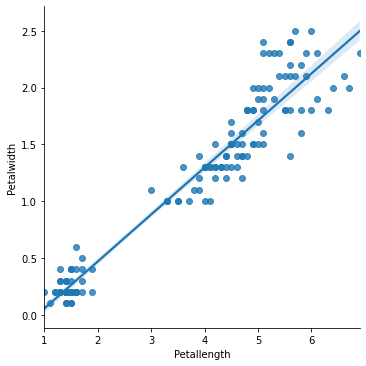

In [42]:
sns.lmplot(x='Petallength',y='Petalwidth', data = dt)
plt.show()